# Exercise 2: Shallow and Deep Neural Networks

### **Student Information**  

Gideon Shachar  
204713689

Noy Rahmani  
311124416

# Q1: The MNIST dataset

Below is a code to train a neural network on the MNIST dataset. The accuracy achieved is ~77%. Try to change the training process in order to improve the network's performance, the best you can.

You can change:

- The loss function.
- The batch size (We will talk about this next week. Meanwhile, if needed, you can read about it a little).
- The learning rate.

Try to tune these parameters in order to achive the best accuracy.

**Don't change the network or the number of epochs**.

**Note:** If you change the loss function, you might need to change relavant parts of the code accordingly.

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Load MNIST dataset from torch datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [2]:
# Define a network class
class SoftmaxNet(nn.Module):
    def __init__(self):
        super(SoftmaxNet, self).__init__()
        torch.manual_seed(0)
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = nn.Softmax(dim=1)(self.fc3(x))
        return x

In [3]:
# One-hot encoding
def one_hot_encode(labels):
    one_hot = torch.zeros(labels.shape[0], 10)
    one_hot[torch.arange(labels.shape[0]), labels] = 1
    return one_hot

In [4]:
def accuracy(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

In [10]:
softmax_net = SoftmaxNet()
criterion = nn.MSELoss()

def train(epochs, lr, criterion):
    optimizer = optim.SGD(softmax_net.parameters(), lr=lr)
    LOSS = []
    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = softmax_net(data)
            loss = criterion(output, one_hot_encode(target))
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
    return LOSS

train(15, 0.01, criterion)
accuracy(softmax_net, test_loader)

Epoch 1, Loss: 0.0891
Epoch 2, Loss: 0.0897
Epoch 3, Loss: 0.0893
Epoch 4, Loss: 0.0880
Epoch 5, Loss: 0.0835
Epoch 6, Loss: 0.0827
Epoch 7, Loss: 0.0836
Epoch 8, Loss: 0.0709
Epoch 9, Loss: 0.0711
Epoch 10, Loss: 0.0697
Epoch 11, Loss: 0.0596
Epoch 12, Loss: 0.0559
Epoch 13, Loss: 0.0567
Epoch 14, Loss: 0.0471
Epoch 15, Loss: 0.0525


77.05

In [6]:
# Baseline: loss=MSE, BZ=64, LR=0.01
# try following exps
# bz = 16, 32, (manually changed it in the loader)
# lr = 0.1, 0.001, 0.03


In [30]:
# test different lrs
for i, lr in enumerate([0.1, 0.001, 0.03]):
  print(f'Exp-{i}: {lr=}')
  train(15, lr, criterion)
  print(f'Accuracy: {accuracy(softmax_net, test_loader)}\n')


Exp-0: lr=0.1
Epoch 1, Loss: 0.0001
Epoch 2, Loss: 0.0001
Epoch 3, Loss: 0.0013
Epoch 4, Loss: 0.0005
Epoch 5, Loss: 0.0002
Epoch 6, Loss: 0.0001
Epoch 7, Loss: 0.0000
Epoch 8, Loss: 0.0001
Epoch 9, Loss: 0.0002
Epoch 10, Loss: 0.0006
Epoch 11, Loss: 0.0001
Epoch 12, Loss: 0.0003
Epoch 13, Loss: 0.0065
Epoch 14, Loss: 0.0004
Epoch 15, Loss: 0.0002
Accuracy: 97.82

Exp-1: lr=0.001
Epoch 1, Loss: 0.0002
Epoch 2, Loss: 0.0003
Epoch 3, Loss: 0.0005
Epoch 4, Loss: 0.0006
Epoch 5, Loss: 0.0001
Epoch 6, Loss: 0.0002
Epoch 7, Loss: 0.0064
Epoch 8, Loss: 0.0006
Epoch 9, Loss: 0.0000
Epoch 10, Loss: 0.0000
Epoch 11, Loss: 0.0000
Epoch 12, Loss: 0.0001
Epoch 13, Loss: 0.0003
Epoch 14, Loss: 0.0005
Epoch 15, Loss: 0.0000
Accuracy: 97.82

Exp-2: lr=0.03
Epoch 1, Loss: 0.0001
Epoch 2, Loss: 0.0002
Epoch 3, Loss: 0.0001
Epoch 4, Loss: 0.0002
Epoch 5, Loss: 0.0001
Epoch 6, Loss: 0.0004
Epoch 7, Loss: 0.0000
Epoch 8, Loss: 0.0000
Epoch 9, Loss: 0.0001
Epoch 10, Loss: 0.0053
Epoch 11, Loss: 0.0000
Epoch

We manually changed the batch size to 16, 32 and ran the 3 experminets again. Below you can see the full results:

 Exp | Learning rate | Loss | Batch Size | Accuracy   
-----|---------------|------|------------|----------
0 (baseline) | 0.01  | MSE | 64 | 77.05   
1            | 0.001 | MSE | 64 | 95.75   
2            | 0.1   | MSE | 64 | 95.78
3            | 0.03  | MSE | 64 | 97.41
4            | 0.001 | MSE | 16 | 97.75   
5            | 0.1   | MSE | 16 | 97.56
6            | 0.03  | MSE | 16 | 97.79
**7**        | **0.001** | **MSE** | **32** | **97.82**
**8**        | **0.1**   | **MSE** | **32** | **97.82**
**9**        | **0.03**  | **MSE** | **32** | **97.81**

We can see the exps with bz=32 where the best, but with a (very) small margin!

# Q2: XOR functions

Train a neural network for the XOR dataset (see below). Experiment with different input sizes ($n=4,8,...$). We aim to work
with inputs having $n=16$ bits, or more. Our goals in this exercise are:

1. Train a neural network to achieve best accuracy on the XOR dataset. For this purpose choose the best networks by tuning, at least a subset, of the follwing parameters:

  - The input representation (e.g., 0/1 or 1/-1).
  - Number of layers.
  - Number of neurons in each layer.
  - Choice of activation function(s).
  - Batch size, for the mini-batch algorithm.
  - Number of epochs.
  - Learning rate.

Note: When you change one parameter you might need to re-tune a parameter you already tuned. For example, if you change the batch size, you might want to consider a different choice for the learning rate. Or, if you take a bigger network, you might want to use less epochs, etc.

2. Study, and demonstrate:
  
  - The effect of the number of layers on the number of neurons needed, and the accuracy attained.
  - The effect of the batch size in the minibatch gradient descent algorithm.
  - The effect of the batch size on the learning rate and other network parameters.
  - How the problem changes when the number of input bits grow.

3. On your final network, try to interpret the representation in the different hidden layers.

If needed you can apply any of the regularization methods we will learn in the next lesson.

Note: If you work with very large $n$, you will not be able to generate all possible 0/1 vectors, and you need to construct the dataset differently. Also, in this case it might be necessary to work with regularization.

## The dataset

In [31]:
import torch
import numpy as np
import pandas as pd

In [32]:
import itertools as it
class XORDataset(torch.utils.data.Dataset):

    @staticmethod
    def random_seubset(m, p=0.7):
        np.random.seed(0)
        return (np.random.uniform(0, 1, m) <= p).astype(int)

    # Generate all 0/1 vectors of length n
    @staticmethod
    def generate(n):
        return list(it.product(*[range(x + 1) for x in [1] * n]))

    def __init__(self, n=16, Train=True):

        all = self.generate(n)
        a = self.random_seubset(2**n)
        if Train:
            self.X = torch.tensor(np.array(all)[a == 1])
        else:
            self.X = torch.tensor(np.array(all)[a == 0])

        self.Y = self.X.sum(dim=1) % 2

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

## Example of a small XOR dataset

In [70]:
data = XORDataset(3)

In [71]:
data.X

tensor([[0, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0]])

In [35]:
data.Y

tensor([0, 1, 0, 1, 0, 0])

In [36]:
data_val = XORDataset(3, Train=False)

In [37]:
data_val.X

tensor([[0, 0, 1],
        [1, 1, 1]])

In [38]:
data_val.Y

tensor([1, 1])

In [49]:
# imports

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from itertools import product

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [54]:
def create_dataloaders(n, batch_size, representation='01'):
  """Create train and test dataloaders"""
  train_dataset = XORDataset(n=n, Train=True)
  test_dataset = XORDataset(n=n, Train=False)

  if representation == '-11':
      train_dataset.X = 2 * train_dataset.X.float() - 1
      test_dataset.X = 2 * test_dataset.X.float() - 1
  else:
      train_dataset.X = train_dataset.X.float()
      test_dataset.X = test_dataset.X.float()

  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  return train_loader, test_loader


In [55]:
class XORNet(nn.Module):
  def __init__(self, input_size, hidden_sizes, activation='relu'):
    super().__init__()

    layers = []
    prev_size = input_size

    for h_size in hidden_sizes:
      layers.append(nn.Linear(prev_size, h_size))

      if activation == 'relu':
        layers.append(nn.ReLU())
      elif activation == 'tanh':
        layers.append(nn.Tanh())
      elif activation == 'sigmoid':
        layers.append(nn.Sigmoid())

      prev_size = h_size

    layers.append(nn.Linear(prev_size, 2))
    self.network = nn.Sequential(*layers)

  def forward(self, x):
    return self.network(x)


In [56]:
def train_model(model, train_loader, test_loader, epochs, lr):
  """Train the model and return training history"""
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

  for epoch in range(epochs):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)

      optimizer.zero_grad()
      outputs = model(X_batch)
      loss = criterion(outputs, y_batch)
      loss.backward()
      optimizer.step()

      train_loss += loss.item() * X_batch.size(0)
      _, predicted = torch.max(outputs, 1)
      train_correct += (predicted == y_batch).sum().item()
      train_total += y_batch.size(0)

    model.eval()
    test_loss, test_correct, test_total = 0, 0, 0

    with torch.no_grad():
      for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        test_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == y_batch).sum().item()
        test_total += y_batch.size(0)

    history['train_loss'].append(train_loss / train_total)
    history['train_acc'].append(train_correct / train_total)
    history['test_loss'].append(test_loss / test_total)
    history['test_acc'].append(test_correct / test_total)

    if (epoch + 1) % 20 == 0:
      print(f'Epoch {epoch+1}/{epochs}: '
      f'Train Acc: {history["train_acc"][-1]:.4f}, '
      f'Test Acc: {history["test_acc"][-1]:.4f}')

  return history

In [57]:
def evaluate_model(model, test_loader):
  """Evaluate model and show confusion matrix"""
  model.eval()
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for X_batch, y_batch in test_loader:
      X_batch = X_batch.to(device)
      outputs = model(X_batch)
      _, predicted = torch.max(outputs, 1)
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(y_batch.numpy())

  acc = accuracy_score(all_labels, all_preds)
  print(f'Test Accuracy: {acc:.4f}')

  cm = confusion_matrix(all_labels, all_preds)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix (Acc: {acc:.4f})')
  plt.show()

  return acc

In [58]:
def plot_training_curves(history, title='Training History'):
  """Plot training and test curves"""
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  ax1.plot(history['train_loss'], label='Train')
  ax1.plot(history['test_loss'], label='Test')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.set_title('Loss Curves')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history['train_acc'], label='Train')
  ax2.plot(history['test_acc'], label='Test')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Accuracy Curves')
  ax2.legend()
  ax2.grid(True)

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

## Experiments

Experiment 1: Input Representation (n=4)

Representation: 01
Epoch 20/100: Train Acc: 0.6364, Test Acc: 0.2000
Epoch 40/100: Train Acc: 0.8182, Test Acc: 0.0000
Epoch 60/100: Train Acc: 0.9091, Test Acc: 0.2000
Epoch 80/100: Train Acc: 0.9091, Test Acc: 0.2000
Epoch 100/100: Train Acc: 0.9091, Test Acc: 0.0000


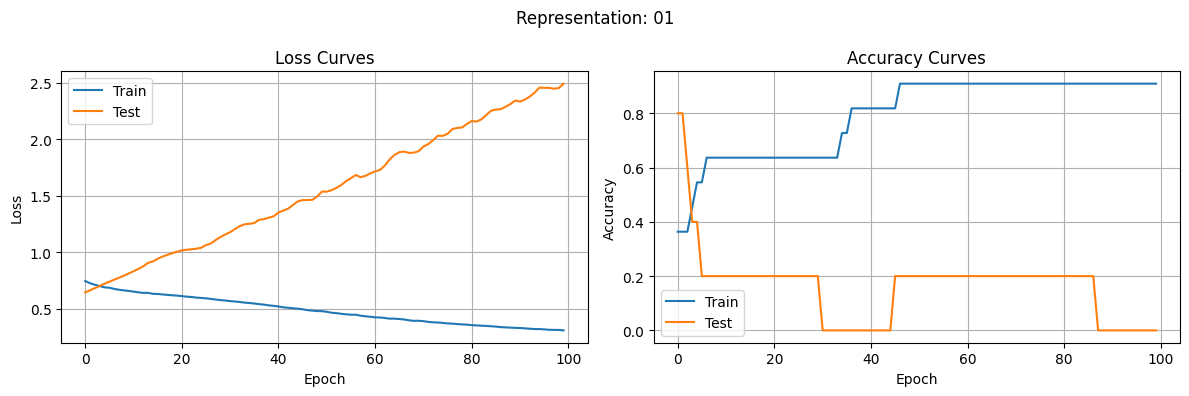

Test Accuracy: 0.0000


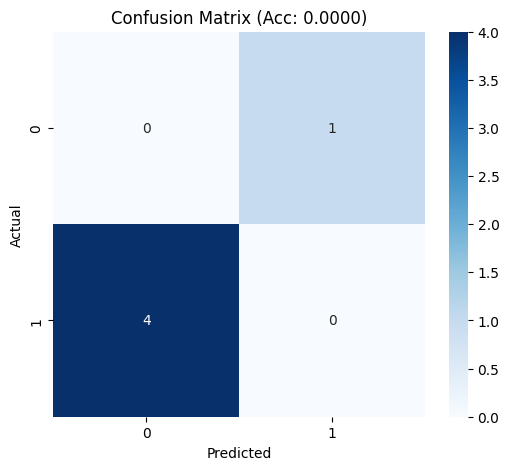


Representation: -11
Epoch 20/100: Train Acc: 0.9091, Test Acc: 0.2000
Epoch 40/100: Train Acc: 1.0000, Test Acc: 0.2000
Epoch 60/100: Train Acc: 1.0000, Test Acc: 0.2000
Epoch 80/100: Train Acc: 1.0000, Test Acc: 0.4000
Epoch 100/100: Train Acc: 1.0000, Test Acc: 0.4000


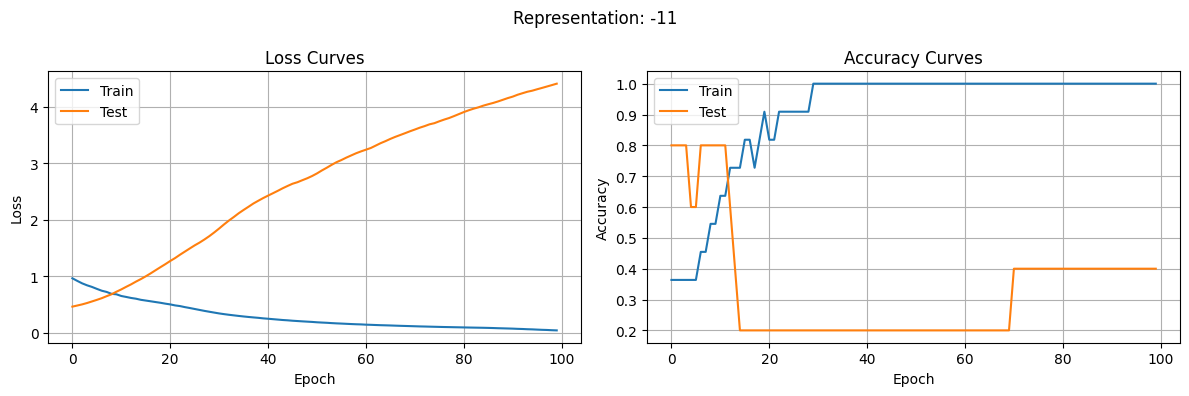

Test Accuracy: 0.4000


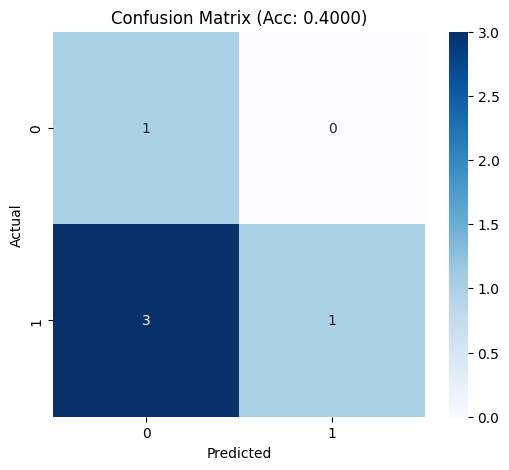

In [77]:
# Experiment 1: Effect of input representation (n=4)
print("="*60)
print("Experiment 1: Input Representation (n=4)")
print("="*60)

for rep in ['01', '-11']:
  print(f"\nRepresentation: {rep}")
  train_loader, test_loader = create_dataloaders(8, batch_size=32, representation=rep)

  model = XORNet(4, [4], activation='relu')
  history = train_model(model, train_loader, test_loader, epochs=100, lr=0.01)
  plot_training_curves(history, f'Representation: {rep}')
  evaluate_model(model, test_loader)


Experiment 2: Network Architecture (n=8)

Architecture: 1 layer, 16 neurons
Epoch 20/150: Train Acc: 0.5829, Test Acc: 0.4348
Epoch 40/150: Train Acc: 0.6524, Test Acc: 0.4493
Epoch 60/150: Train Acc: 0.6578, Test Acc: 0.4783
Epoch 80/150: Train Acc: 0.6845, Test Acc: 0.4203
Epoch 100/150: Train Acc: 0.6952, Test Acc: 0.4348
Epoch 120/150: Train Acc: 0.7005, Test Acc: 0.4348
Epoch 140/150: Train Acc: 0.7219, Test Acc: 0.4638
Test Accuracy: 0.4783


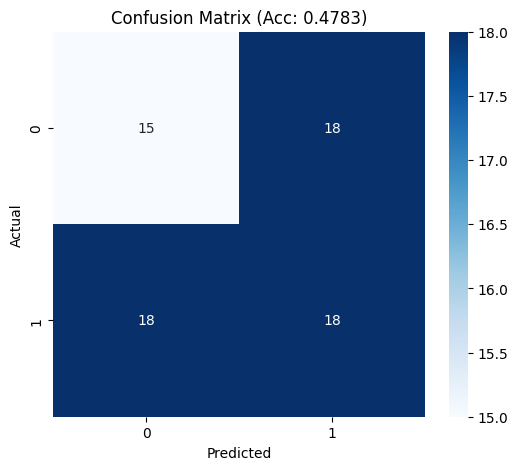


Architecture: 2 layers, [32, 16]
Epoch 20/150: Train Acc: 0.6043, Test Acc: 0.3043
Epoch 40/150: Train Acc: 0.6791, Test Acc: 0.3188
Epoch 60/150: Train Acc: 0.7647, Test Acc: 0.3333
Epoch 80/150: Train Acc: 0.8075, Test Acc: 0.3768
Epoch 100/150: Train Acc: 0.9144, Test Acc: 0.4928
Epoch 120/150: Train Acc: 0.9733, Test Acc: 0.5652
Epoch 140/150: Train Acc: 0.9947, Test Acc: 0.6522
Test Accuracy: 0.6957


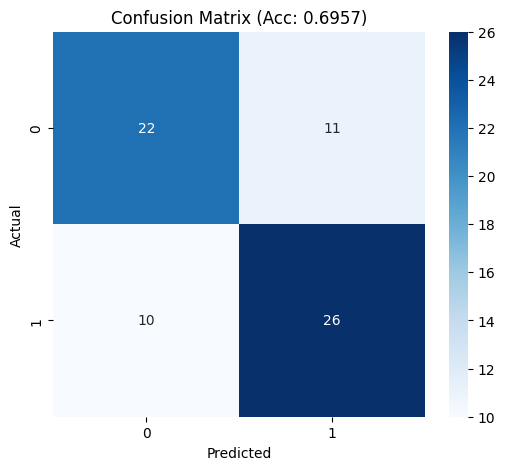


Architecture: 3 layers, [64, 32, 16]
Epoch 20/150: Train Acc: 0.6791, Test Acc: 0.2174
Epoch 40/150: Train Acc: 0.9840, Test Acc: 0.4638
Epoch 60/150: Train Acc: 1.0000, Test Acc: 0.5507
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.5942
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.6087
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.6377
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.6667
Test Accuracy: 0.6812


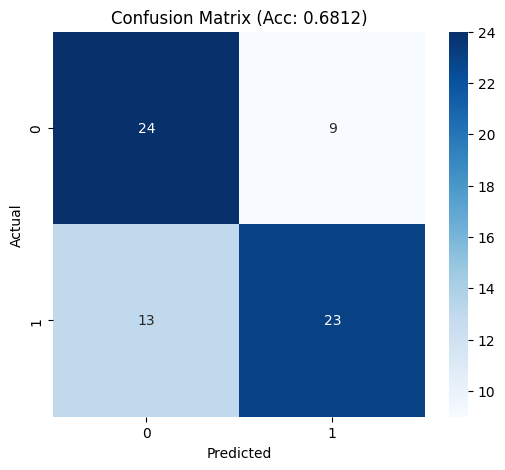


Architecture: 2 layers, [128, 64]
Epoch 20/150: Train Acc: 0.6684, Test Acc: 0.2609
Epoch 40/150: Train Acc: 0.9840, Test Acc: 0.5072
Epoch 60/150: Train Acc: 1.0000, Test Acc: 0.7826
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.8261
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.8261
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.8406
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.8551
Test Accuracy: 0.8406


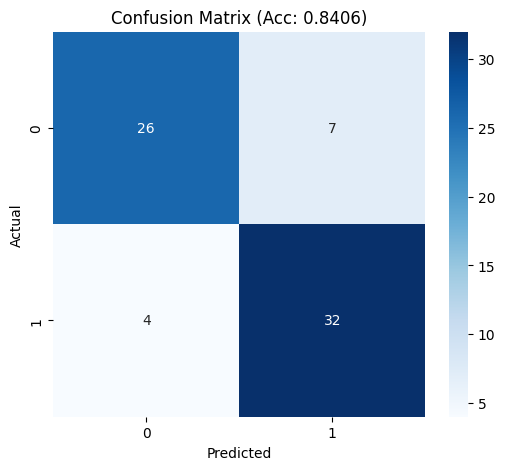


Architecture: 3 layers, [784, 128, 64]
Epoch 20/150: Train Acc: 0.9144, Test Acc: 0.3768
Epoch 40/150: Train Acc: 1.0000, Test Acc: 0.4058
Epoch 60/150: Train Acc: 1.0000, Test Acc: 0.4348
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.4493
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.4493
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.4783
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.4783
Test Accuracy: 0.4783


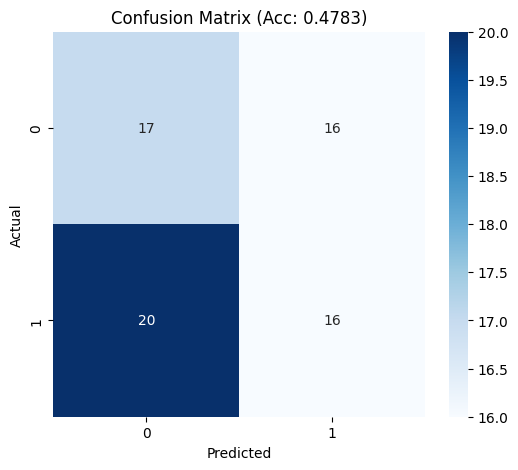


Architecture Comparison:
1 layer, 16 neurons: 0.4783
2 layers, [32, 16]: 0.6957
3 layers, [64, 32, 16]: 0.6812
2 layers, [128, 64]: 0.8406
3 layers, [784, 128, 64]: 0.4783


In [75]:
# Experiment 2: Effect of network depth and width (n=8)
print("\n" + "="*60)
print("Experiment 2: Network Architecture (n=8)")
print("="*60)

architectures = [
  ([16], "1 layer, 16 neurons"),
  ([32, 16], "2 layers, [32, 16]"),
  ([64, 32, 16], "3 layers, [64, 32, 16]"),
  ([128, 64], "2 layers, [128, 64]"),
  ([784, 128, 64], "3 layers, [784, 128, 64]")
]

results = []
for arch, desc in architectures:
  print(f"\nArchitecture: {desc}")
  train_loader, test_loader = create_dataloaders(8, batch_size=16, representation='-11')

  model = XORNet(8, arch, activation='relu')
  history = train_model(model, train_loader, test_loader, epochs=150, lr=0.001)
  plot_training_curves(history, f'Representation: -11')
  acc = evaluate_model(model, test_loader)
  results.append((desc, acc))

print("\nArchitecture Comparison:")
for desc, acc in results:
  print(f"{desc}: {acc:.4f}")


Experiment 3: Batch Size Effect (n=8)

Batch Size: 4
Epoch 20/150: Train Acc: 0.6364, Test Acc: 0.2754
Epoch 40/150: Train Acc: 0.8503, Test Acc: 0.4203
Epoch 60/150: Train Acc: 0.9840, Test Acc: 0.5507
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.6232
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.7101
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.7536
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.7971
Test Accuracy: 0.7681


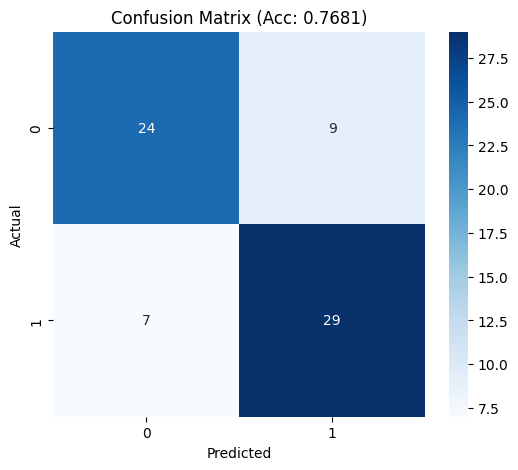


Batch Size: 16
Epoch 20/150: Train Acc: 0.6524, Test Acc: 0.3043
Epoch 40/150: Train Acc: 0.8610, Test Acc: 0.5362
Epoch 60/150: Train Acc: 0.9626, Test Acc: 0.7246
Epoch 80/150: Train Acc: 0.9893, Test Acc: 0.7971
Epoch 100/150: Train Acc: 0.9947, Test Acc: 0.7826
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.8116
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.8551
Test Accuracy: 0.8696


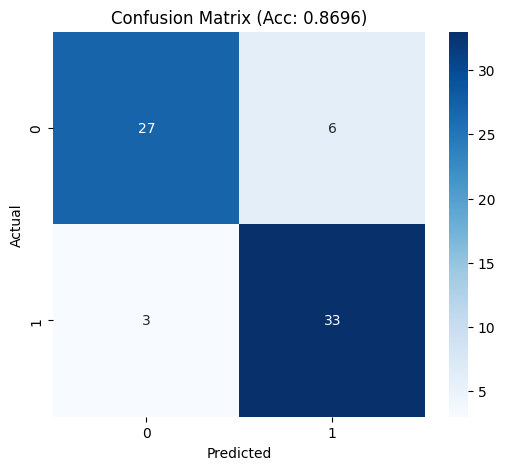


Batch Size: 32
Epoch 20/150: Train Acc: 0.6524, Test Acc: 0.2464
Epoch 40/150: Train Acc: 0.8396, Test Acc: 0.3478
Epoch 60/150: Train Acc: 0.9947, Test Acc: 0.5507
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.6522
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.7101
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.7536
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.7826
Test Accuracy: 0.7971


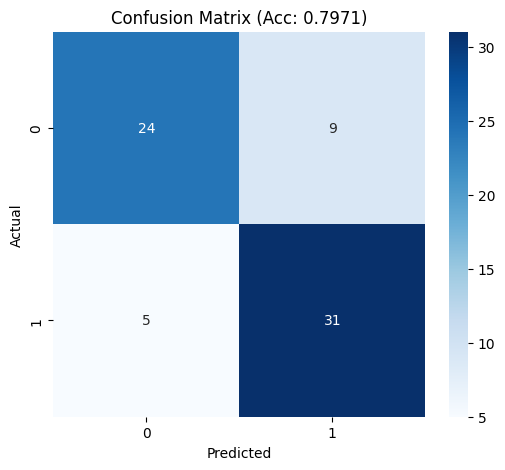


Batch Size: 64
Epoch 20/150: Train Acc: 0.6578, Test Acc: 0.3333
Epoch 40/150: Train Acc: 0.7914, Test Acc: 0.3478
Epoch 60/150: Train Acc: 0.9679, Test Acc: 0.5072
Epoch 80/150: Train Acc: 1.0000, Test Acc: 0.5797
Epoch 100/150: Train Acc: 1.0000, Test Acc: 0.6667
Epoch 120/150: Train Acc: 1.0000, Test Acc: 0.6812
Epoch 140/150: Train Acc: 1.0000, Test Acc: 0.7246
Test Accuracy: 0.7391


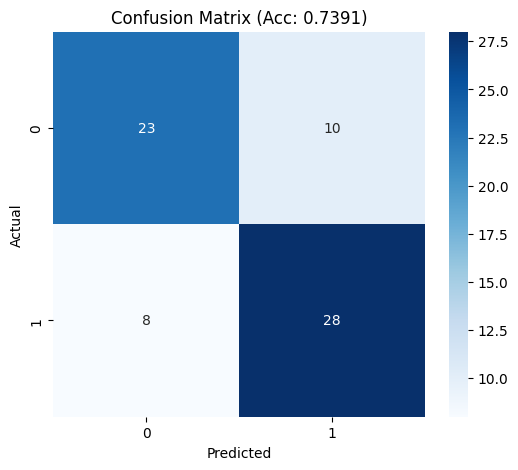


Batch Size Comparison:
Batch size 4: 0.7681
Batch size 16: 0.8696
Batch size 32: 0.7971
Batch size 64: 0.7391


In [78]:
# Experiment 3: Effect of batch size (n=8)
print("\n" + "="*60)
print("Experiment 3: Batch Size Effect (n=8)")
print("="*60)

batch_sizes = [4, 16, 32, 64]
batch_results = []

for bs in batch_sizes:
  print(f"\nBatch Size: {bs}")
  train_loader, test_loader = create_dataloaders(8, batch_size=bs, representation='-11')

  lr = 0.001 * np.sqrt(bs / 16)

  model = XORNet(8, [64, 32], activation='relu')
  history = train_model(model, train_loader, test_loader, epochs=150, lr=lr)
  plot_training_curves(history, f'Representation: -11')
  acc = evaluate_model(model, test_loader)
  batch_results.append((bs, acc))

print("\nBatch Size Comparison:")
for bs, acc in batch_results:
  print(f"Batch size {bs}: {acc:.4f}")



Experiment 4: Scaling to Larger Inputs

Input size: n=12
Epoch 20/200: Train Acc: 0.8704, Test Acc: 0.8225
Epoch 40/200: Train Acc: 0.9619, Test Acc: 0.9327
Epoch 60/200: Train Acc: 0.9776, Test Acc: 0.9506
Epoch 80/200: Train Acc: 0.9906, Test Acc: 0.9611
Epoch 100/200: Train Acc: 0.9955, Test Acc: 0.9627
Epoch 120/200: Train Acc: 0.9962, Test Acc: 0.9627
Epoch 140/200: Train Acc: 0.9990, Test Acc: 0.9814
Epoch 160/200: Train Acc: 0.9927, Test Acc: 0.9724
Epoch 180/200: Train Acc: 0.9923, Test Acc: 0.9514
Epoch 200/200: Train Acc: 1.0000, Test Acc: 0.9797


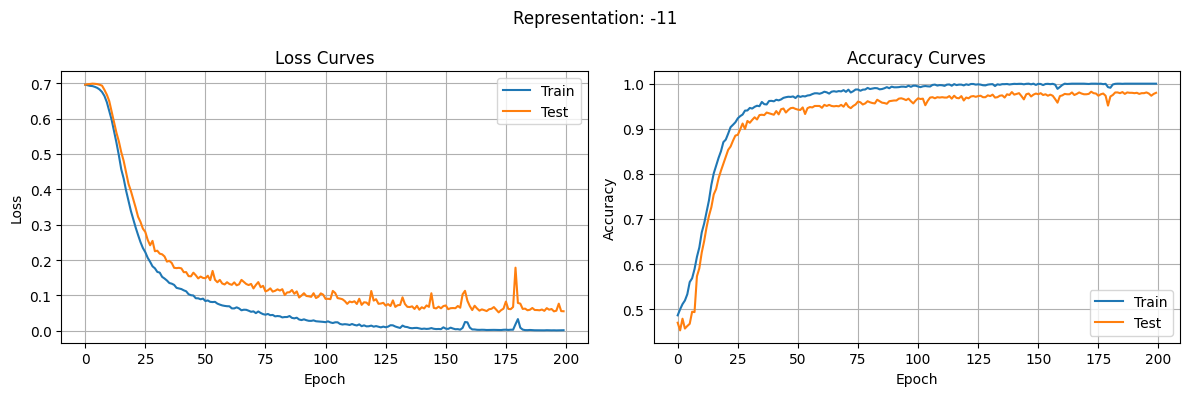

Test Accuracy: 0.9797


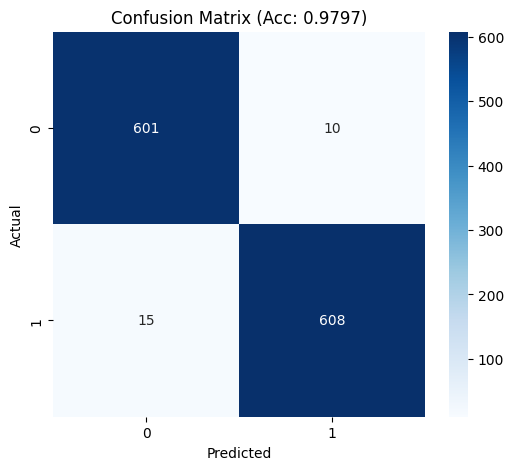


Input size: n=16
Epoch 20/200: Train Acc: 0.9959, Test Acc: 0.9943
Epoch 40/200: Train Acc: 0.9978, Test Acc: 0.9969
Epoch 60/200: Train Acc: 0.9984, Test Acc: 0.9972
Epoch 80/200: Train Acc: 0.9987, Test Acc: 0.9918
Epoch 100/200: Train Acc: 0.9988, Test Acc: 0.9993
Epoch 120/200: Train Acc: 0.9988, Test Acc: 0.9983
Epoch 140/200: Train Acc: 0.9998, Test Acc: 0.9996
Epoch 160/200: Train Acc: 0.9996, Test Acc: 0.9993
Epoch 180/200: Train Acc: 0.9991, Test Acc: 0.9992
Epoch 200/200: Train Acc: 0.9998, Test Acc: 0.9987


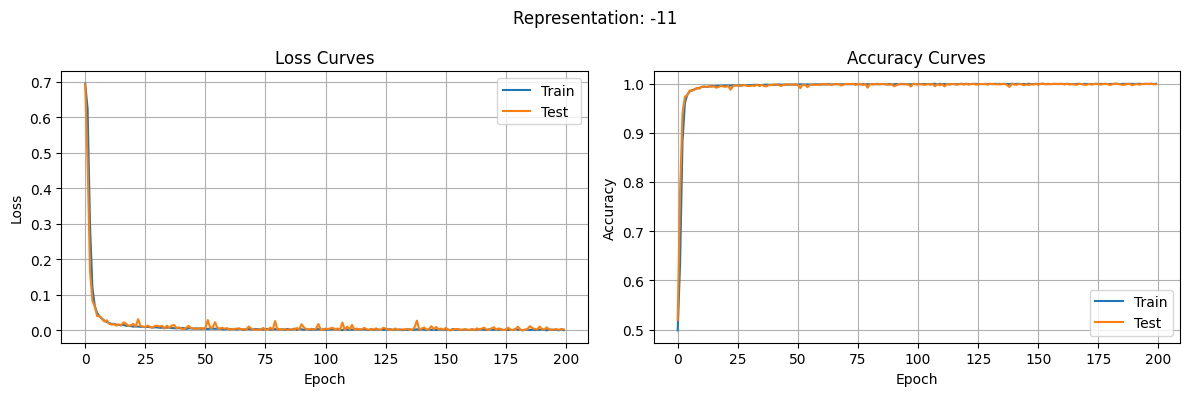

Test Accuracy: 0.9987


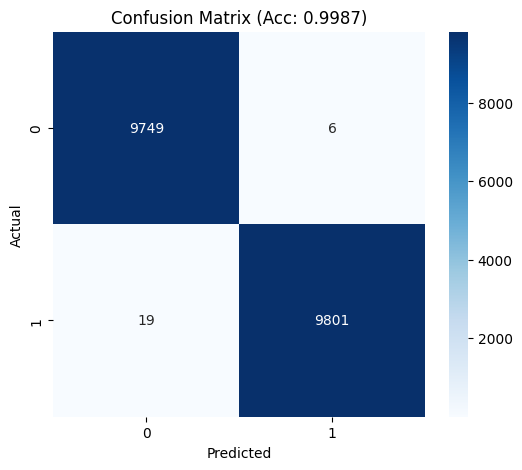

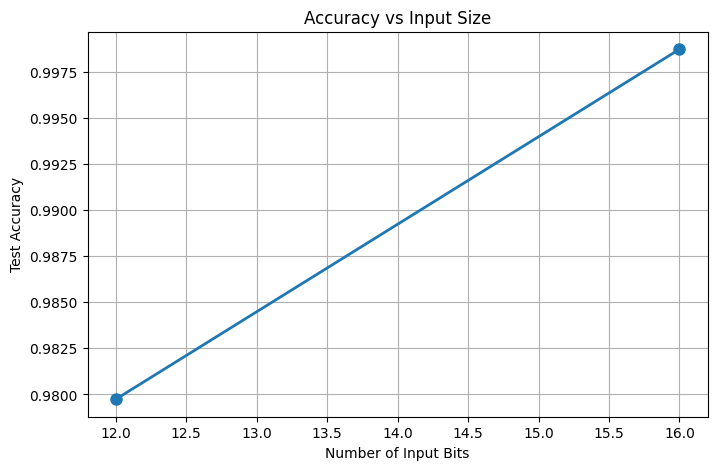

In [80]:
# Experiment 4: Scaling to larger inputs
print("\n" + "="*60)
print("Experiment 4: Scaling to Larger Inputs")
print("="*60)

input_sizes = [12, 16]
scaling_results = []

for n in input_sizes:
  print(f"\nInput size: n={n}")
  train_loader, test_loader = create_dataloaders(n, batch_size=32, representation='-11')

  hidden_size = max(32, n * 4)
  model = XORNet(n, [hidden_size, hidden_size // 2], activation='relu')

  history = train_model(model, train_loader, test_loader, epochs=200, lr=0.001)
  plot_training_curves(history, f'Representation: -11')
  acc = evaluate_model(model, test_loader)
  scaling_results.append((n, acc))

  if acc > 0.99:
    continue

plt.figure(figsize=(8, 5))
ns, accs = zip(*scaling_results)
plt.plot(ns, accs, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Input Bits')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Input Size')
plt.grid(True)
plt.show()


## Final Model for n=16


Final Model: Optimized Network (n=16)

Model architecture:
XORNet(
  (network): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)
Epoch 20/250: Train Acc: 0.9974, Test Acc: 0.9978
Epoch 40/250: Train Acc: 0.9985, Test Acc: 0.9947
Epoch 60/250: Train Acc: 0.9997, Test Acc: 0.9914
Epoch 80/250: Train Acc: 0.9997, Test Acc: 0.9993
Epoch 100/250: Train Acc: 0.9999, Test Acc: 0.9996
Epoch 120/250: Train Acc: 0.9997, Test Acc: 0.9993
Epoch 140/250: Train Acc: 1.0000, Test Acc: 0.9996
Epoch 160/250: Train Acc: 1.0000, Test Acc: 0.9996
Epoch 180/250: Train Acc: 1.0000, Test Acc: 0.9995
Epoch 200/250: Train Acc: 0.9993, Test Acc: 0.9988
Epoch 220/250: Train Acc: 1.0000, Test Acc: 0.9995
Epoch 240/250: Train Acc: 1.0000, Test Acc: 0.9996


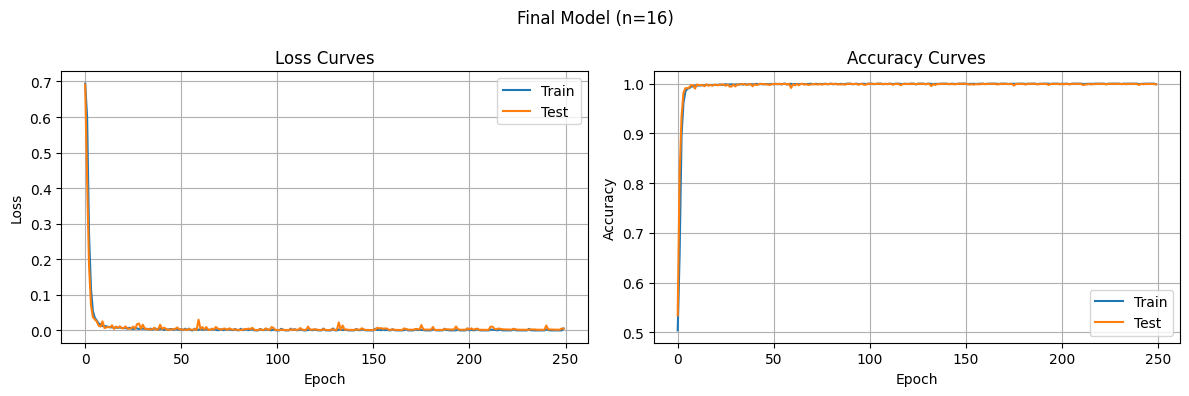

Test Accuracy: 0.9988


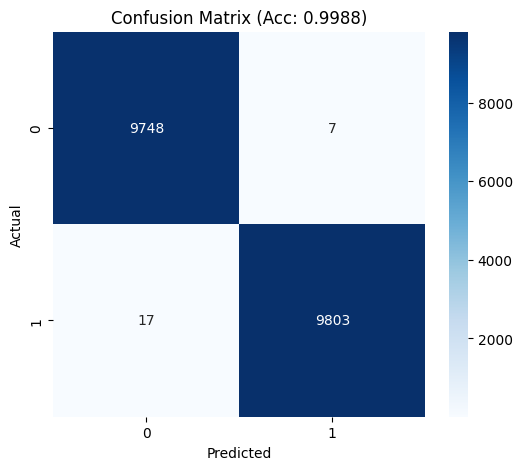

0.9987739463601533

In [81]:
print("\n" + "="*60)
print("Final Model: Optimized Network (n=16)")
print("="*60)

train_loader, test_loader = create_dataloaders(16, batch_size=32, representation='-11')

final_model = XORNet(16, [128, 64], activation='relu')
print(f"\nModel architecture:\n{final_model}")

history = train_model(final_model, train_loader, test_loader, epochs=250, lr=0.001)
plot_training_curves(history, 'Final Model (n=16)')
evaluate_model(final_model, test_loader)



Hidden Layer Analysis


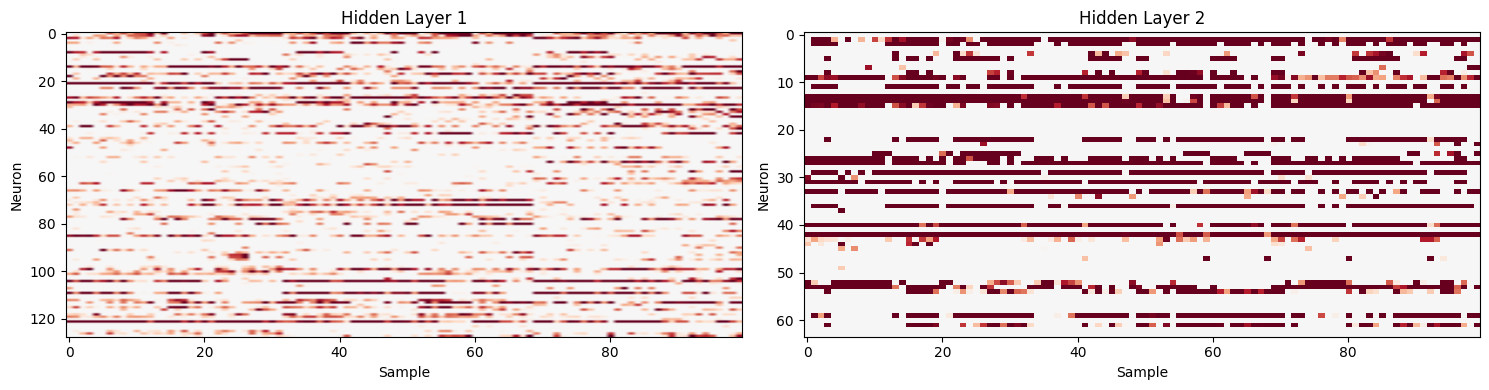


Layer 1 statistics:
  Mean activation: 0.296
  Std activation: 0.686
  Sparsity (zeros): 0.728

Layer 2 statistics:
  Mean activation: 1.548
  Std activation: 3.073
  Sparsity (zeros): 0.714


In [82]:
# Hidden layer analysis
print("\n" + "="*60)
print("Hidden Layer Analysis")
print("="*60)

final_model.eval()
test_dataset = XORDataset(n=16, Train=False)
test_dataset.X = 2 * test_dataset.X.float() - 1
sample_inputs = test_dataset.X[:100].to(device)

activations = []
def hook_fn(module, input, output):
  activations.append(output.detach().cpu().numpy())

hooks = []
for layer in final_model.network:
  if isinstance(layer, nn.ReLU):
    hooks.append(layer.register_forward_hook(hook_fn))

with torch.no_grad():
  _ = final_model(sample_inputs)

for hook in hooks:
  hook.remove()

fig, axes = plt.subplots(1, len(activations), figsize=(15, 4))
for i, act in enumerate(activations):
  axes[i].imshow(act.T, aspect='auto', cmap='RdBu_r', vmin=-2, vmax=2)
  axes[i].set_title(f'Hidden Layer {i+1}')
  axes[i].set_xlabel('Sample')
  axes[i].set_ylabel('Neuron')

plt.tight_layout()
plt.show()

for i, act in enumerate(activations):
  print(f"\nLayer {i+1} statistics:")
  print(f"  Mean activation: {np.mean(act):.3f}")
  print(f"  Std activation: {np.std(act):.3f}")
  print(f"  Sparsity (zeros): {np.mean(act == 0):.3f}")